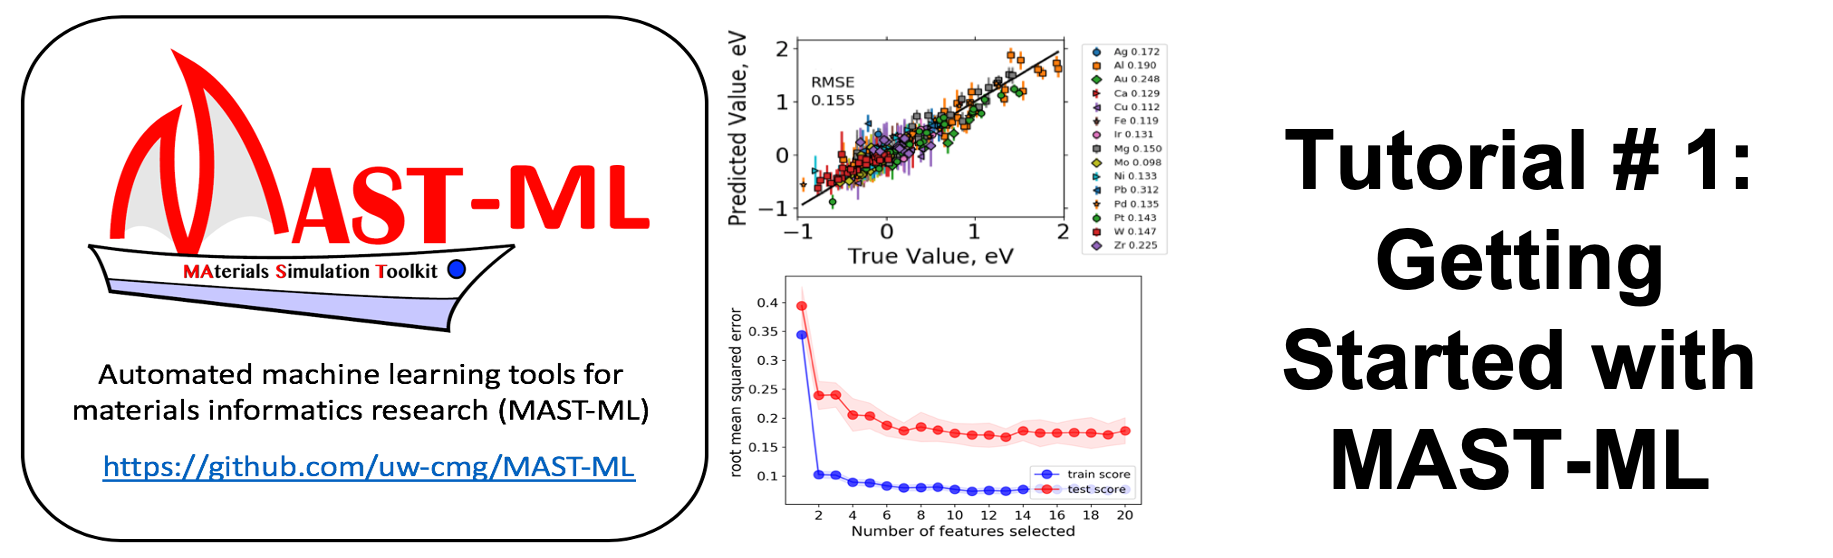

# Welcome to the first MAST-ML tutorial notebook, 

# Getting Started with MAST-ML! 

## In this notebook, we will perform a first, basic run where we: 

1. [Set up MAST-ML on Colab and begin session](#task1)
2. [Import example data of Boston housing prices](#task2)
3. [Define a data preprocessor to normalize the data](#task3)
4. [Define a linear regression model and kernel ridge model to fit the data](#task4)
5. [Evaluate each of our models with 5-fold cross validation](#task5)
6. [Add a random forest model to our run and compare model performance](#task6)


## Task 1: Set up MAST-ML on Colab and begin session <a name="task1"></a>

If you are working on Google Colab and need to install MAST-ML, 
begin by pip installing MAST-ML to the Colab session
and install the needed dependencies:

In [ ]:
!pip install mastml 

Sync your Google drive to Colab so that we can save MAST-ML results to our Google
Drive. If we save to the Colab session, the data will be deleted when the session 
ends.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Here we import the MAST-ML modules used in this tutorial

In [ ]:
from mastml.mastml import Mastml
from mastml.datasets import SklearnDatasets
from mastml.preprocessing import SklearnPreprocessor
from mastml.models import SklearnModel
from mastml.data_splitters import SklearnDataSplitter

Here, we set the name of the savepath to save MAST-ML results to, and initialize
our MAST-ML run

When the above command is run, a new folder with the name designated SAVEPATH is created.
This is where all of the output for the current MAST-ML run will be saved to.
Note that you can perform multiple runs with the same folder name, and the current datetime
will be appended to the name so that no data is lost or overwritten.

In [ ]:
SAVEPATH = 'drive/MyDrive/MASTML_tutorial_1_GettingStarted'

mastml_instance = Mastml(savepath=SAVEPATH)
savepath = mastml_instance.get_savepath

## Task 2: Import example data of Boston housing prices <a name="task2"></a>

Here, we use the SklearnDatasets module to load in the data used in this tutorial.
In this tutorial, we examine the model dataset of Boston housing prices.

In [ ]:
X, y = SklearnDatasets(as_frame=True).load_boston()

Let's quickly examine the X data so we know what we're dealing with:

In [ ]:
X

We have 506 data points (houses) and 13 columns (features). The features aren't the
most straightforward to discern at first glance, but they include data such as square footage, age, zoning
area, etc.

From looking at the y-data, we see that the target data are home prices, in thousands. This
data is from a while ago, which is why the prices are so low by today's standards

In [ ]:
y

## Task 3: Define a data preprocessor to normalize the data <a name="task3"></a>

This data set already has a set of 13 features, so we don't need to generate
any more for the purposes of this example. However, we do want to normalize 
our data for improved model fitting. Here, we define our preprocessing function. 
We are just going to use the basic StandardScaler in scikit-learn to normalize 
each column to have mean zero and standard deviation of one.

In [ ]:
preprocessor = SklearnPreprocessor(preprocessor='StandardScaler', as_frame=True)

## Task 4: Define a linear regression model and kernel ridge model to fit the data <a name="task4"></a>

Now we need to decide what types of models to fit to the Boston housing data.
Here, we define two models. The first is a basic linear regression model, and
the second is a kernel ridge model with Gaussian kernel. The scikit-learn model name can 
just be given as a string matching the model name in the "model" field. 
The remaining arguments are the parameters to pass to the model. If no parameters 
are given, default values are used.

In [ ]:
model1 = SklearnModel(model='LinearRegression')
model2 = SklearnModel(model='KernelRidge', kernel='rbf')

MAST-ML takes a list of the models as input:

In [ ]:
models = [model1, model2]

## Task 5: Evaluate each of our models with 5-fold cross validation <a name="task5"></a>

The heart of any MAST-ML run is evaluating the chosen features and model on particular
subsets of the data. Here, we will do a basic example of running a random 
leave-out cross validation test (5-fold CV). MAST-ML will output data and plots
for each split as well as some more comprehensive analysis performed over all
splits. The saved model and preprocessor corresponding to the best split will
also be put in the split directory, which can be imported for use in future
predictions 

In [ ]:
splitter = SklearnDataSplitter(splitter='RepeatedKFold', n_repeats=1, n_splits=5)
splitter.evaluate(X=X,
                  y=y, 
                  models=models,
                  mastml=mastml_instance,
                  preprocessor=preprocessor,
                  savepath=savepath,
                  verbosity=3)

Now that the MAST-ML run has completed, you can check the contents of the output folder.
You'll see that two new folders were made inside of it. They are:

     1.) LinearRegression_RepeatedKFold_SklearnPreprocessor

     2.) KernelRidge_RepeatedKFold_SklearnPreprocessor

At the top level of each of these folders, you will see a number of .xlsx data files and analysis
image files. Examine the data plot named 'parity_plot_test.png' for each model
folder. This plot displays the true vs predicted values for all test data. 


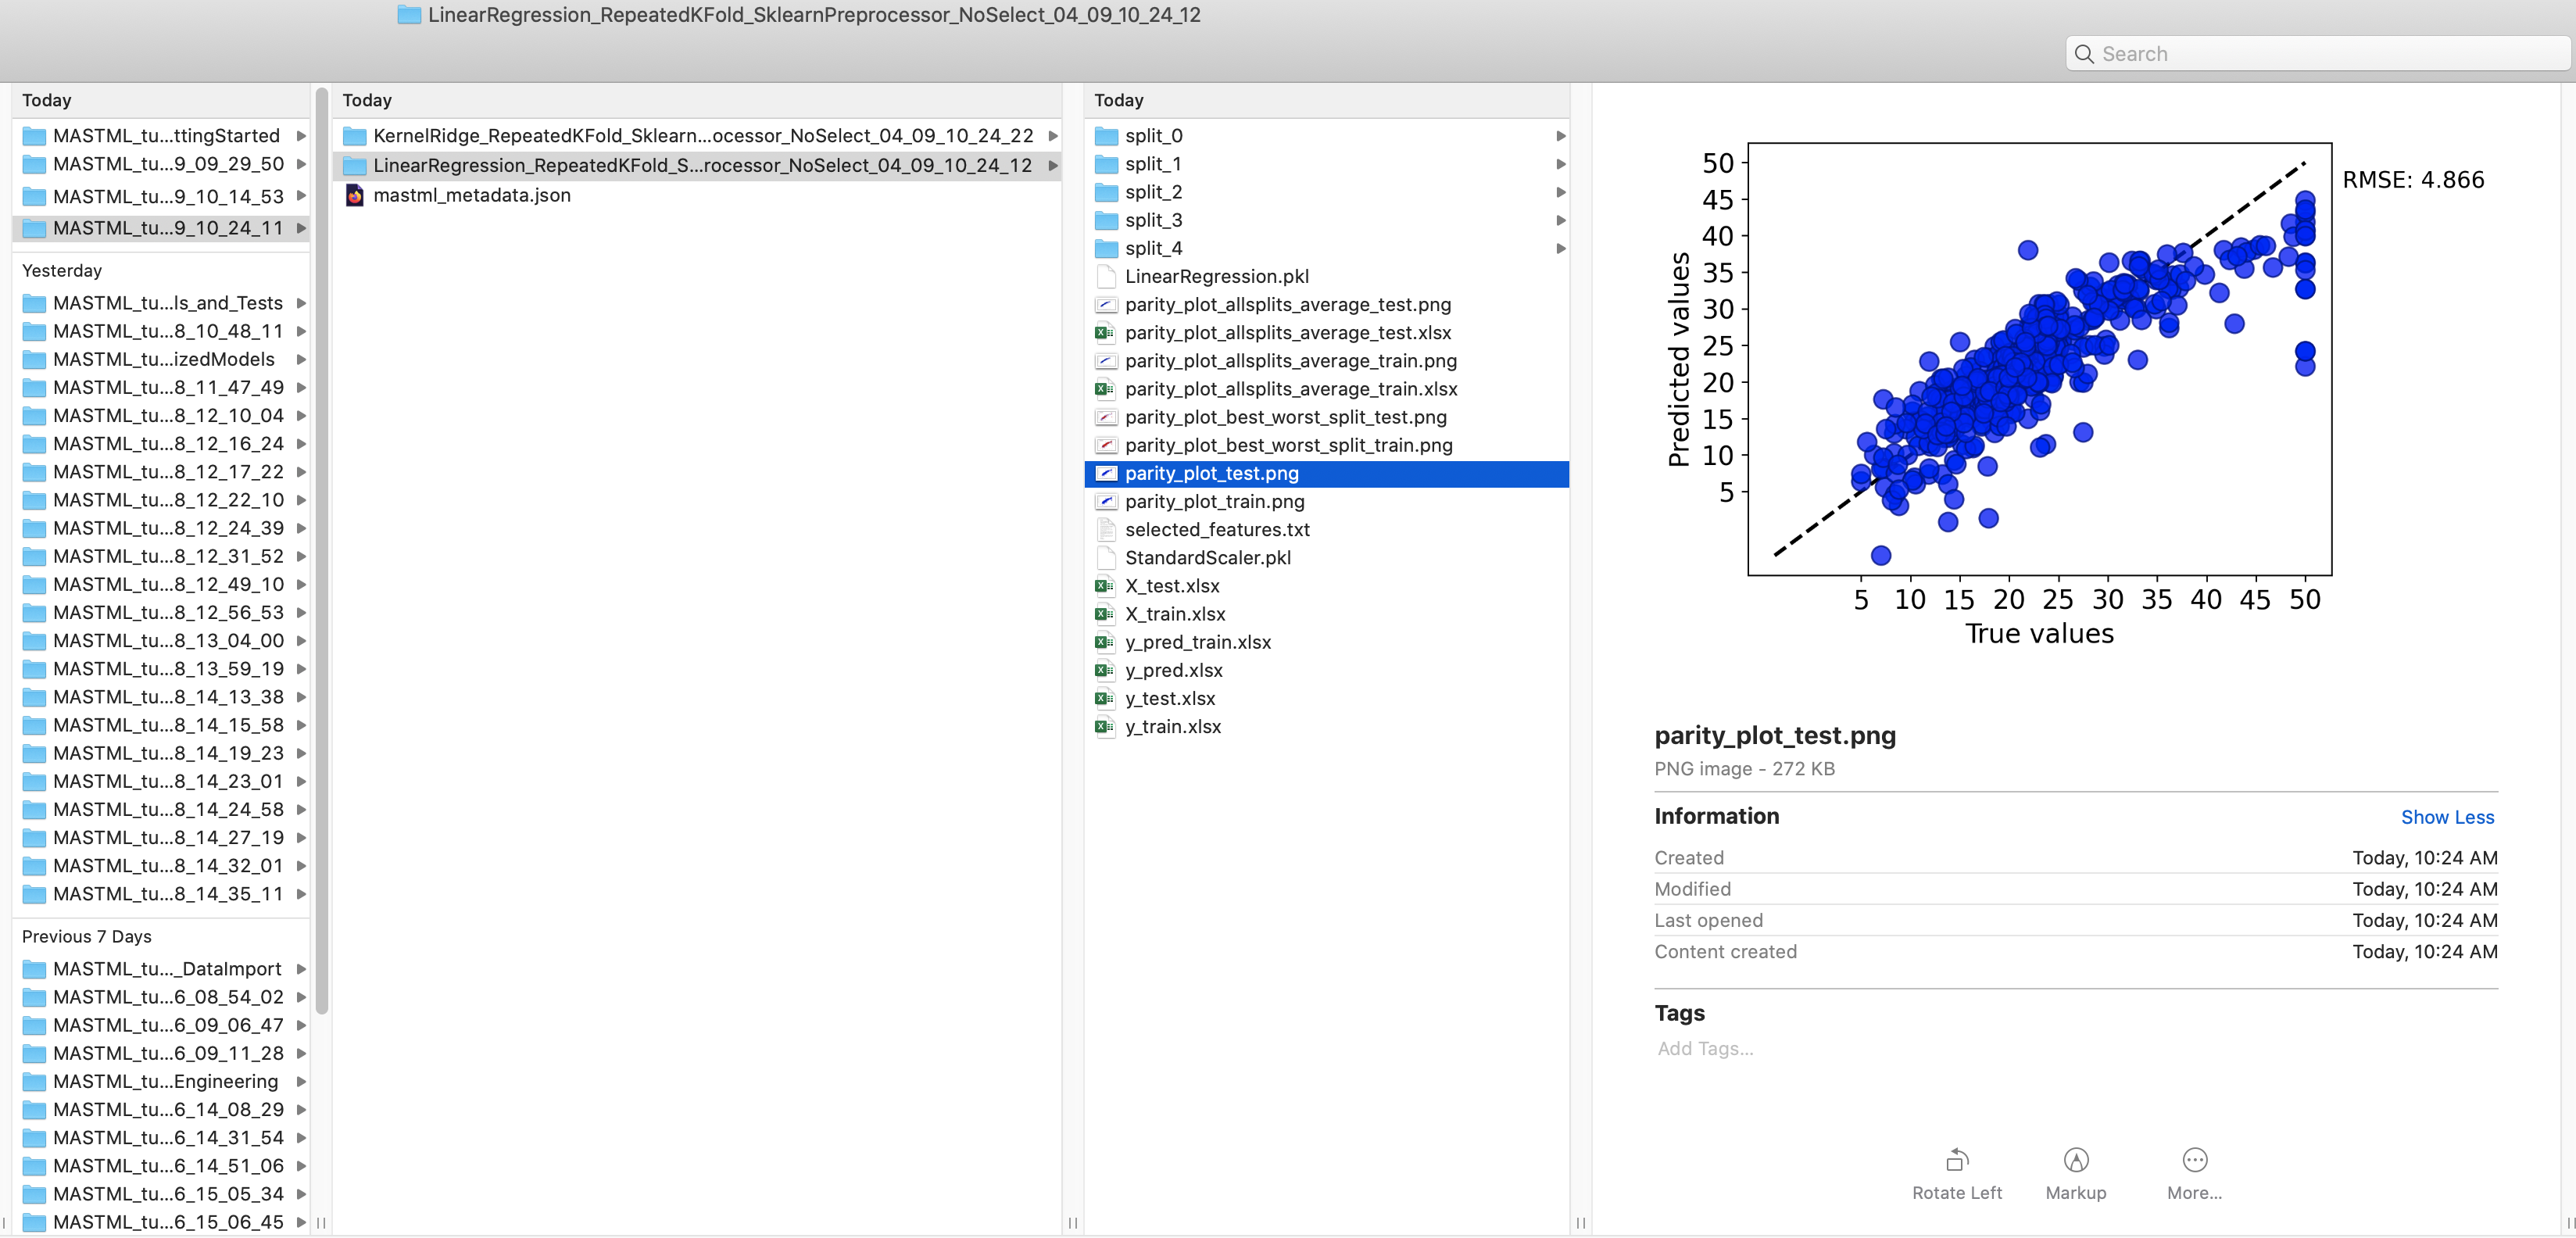

As you can see from the directory structure, MAST-ML saves output for each split performed. 
Looking in one of these split folders, we can see there are a number of data files, including
the train and test data (before and after preprocessing), the calculated residuals on train and
test data, parity plots showing graphically the model performance on train and test data, and 
the saved model and preprocessor files (in .pkl format).

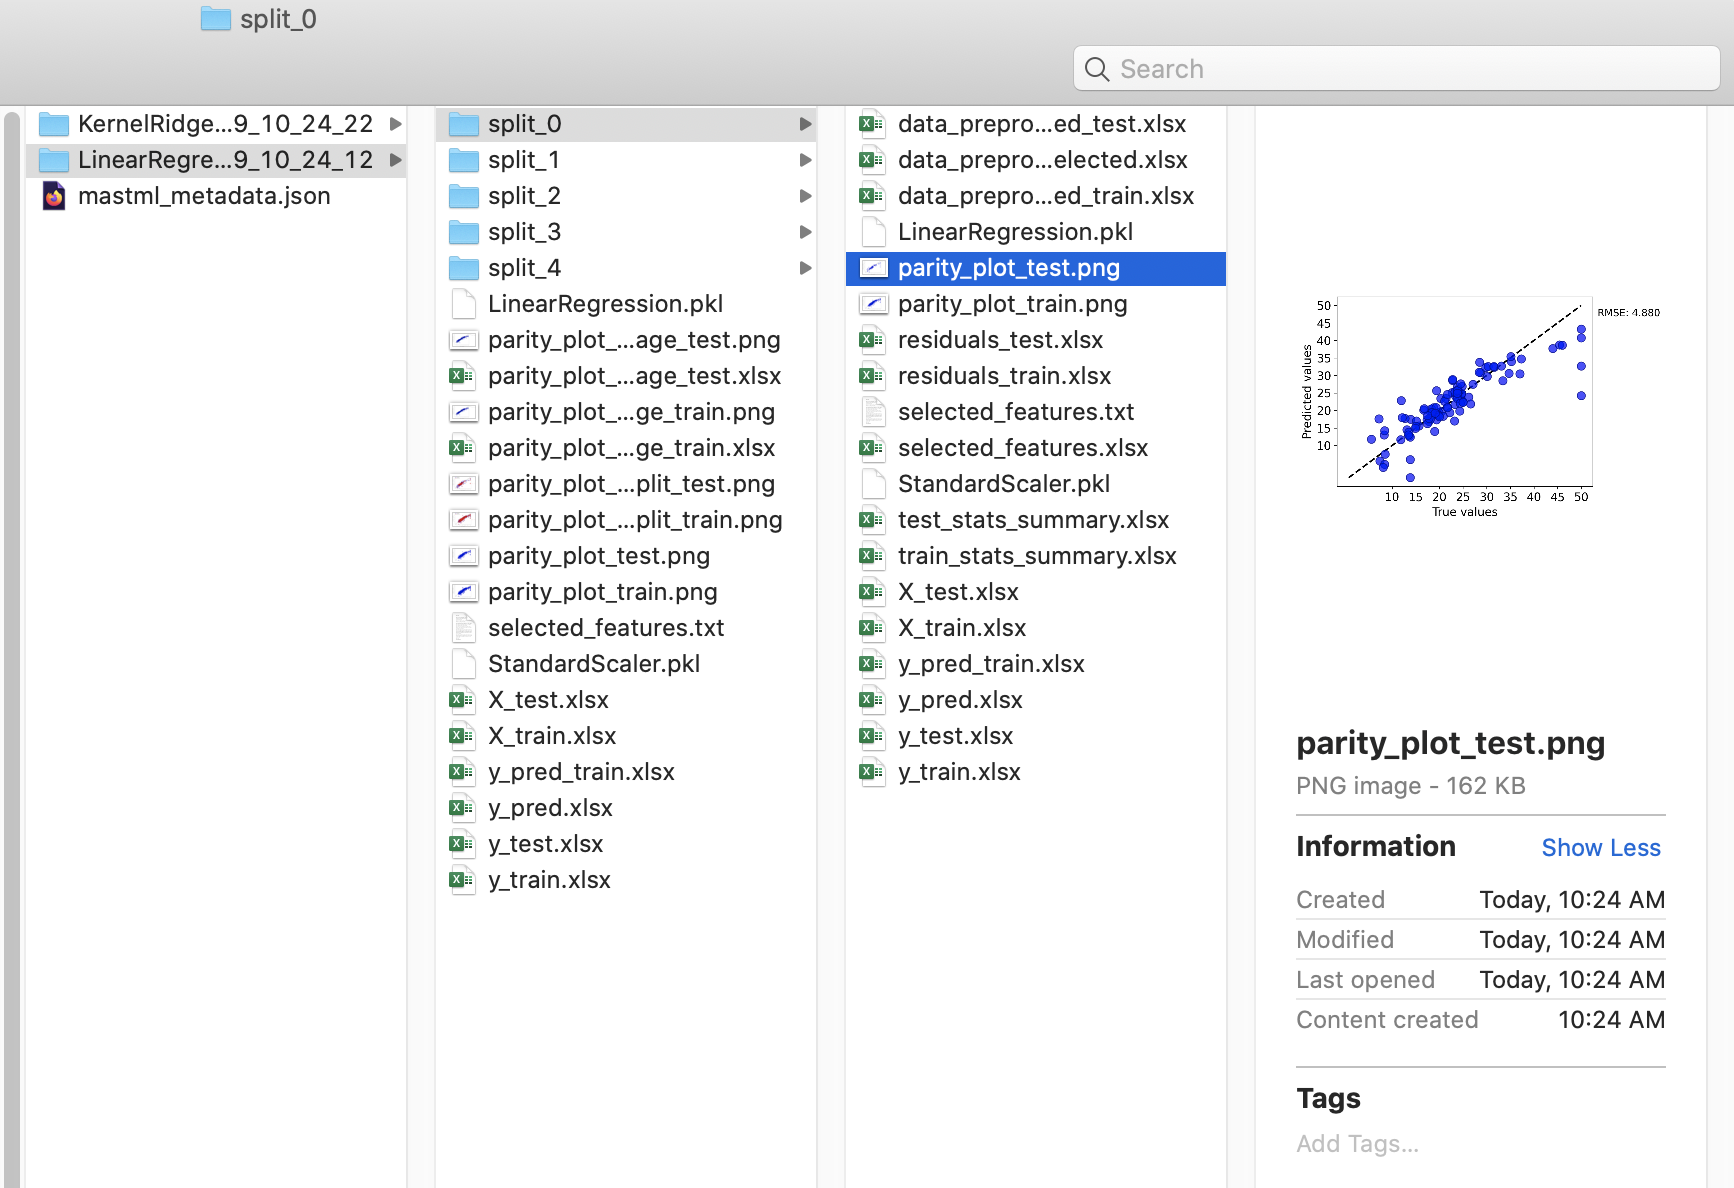

## Task 6: Add a random forest model to our run and compare model performance <a name="task6"></a>

Since MAST-ML is now run in a notebook environment, you can go back and add new models, preprocessors, or even
add new features to your data and re-run the above defined data splitter. Similar as with the main save directory,
the data splitter directory names with have the current datetime appended to their base names to prevent data loss.

Here, let's suppose we want to check how a random forest model would perform on our data. Let's make the random forest model then execute the same 5-fold cross validation routine we did on the linear regression and kernel ridge models:

In [ ]:
model3 = SklearnModel(model='RandomForestRegressor')
splitter = SklearnDataSplitter(splitter='RepeatedKFold', n_repeats=1, n_splits=5)
splitter.evaluate(X=X,
                  y=y, 
                  models=[model3],
                  mastml=mastml_instance,
                  preprocessor=preprocessor,
                  savepath=savepath,
                  verbosity=3)

We can now see that the random forest analysis folder has been added to our main MAST-ML save path. Which of our models performed the best? Parity plots of true vs. predicted values on the test data from cross validation are shown below. It looks like the random forest model has the lowest RMSE!

## Linear model test data parity plot:
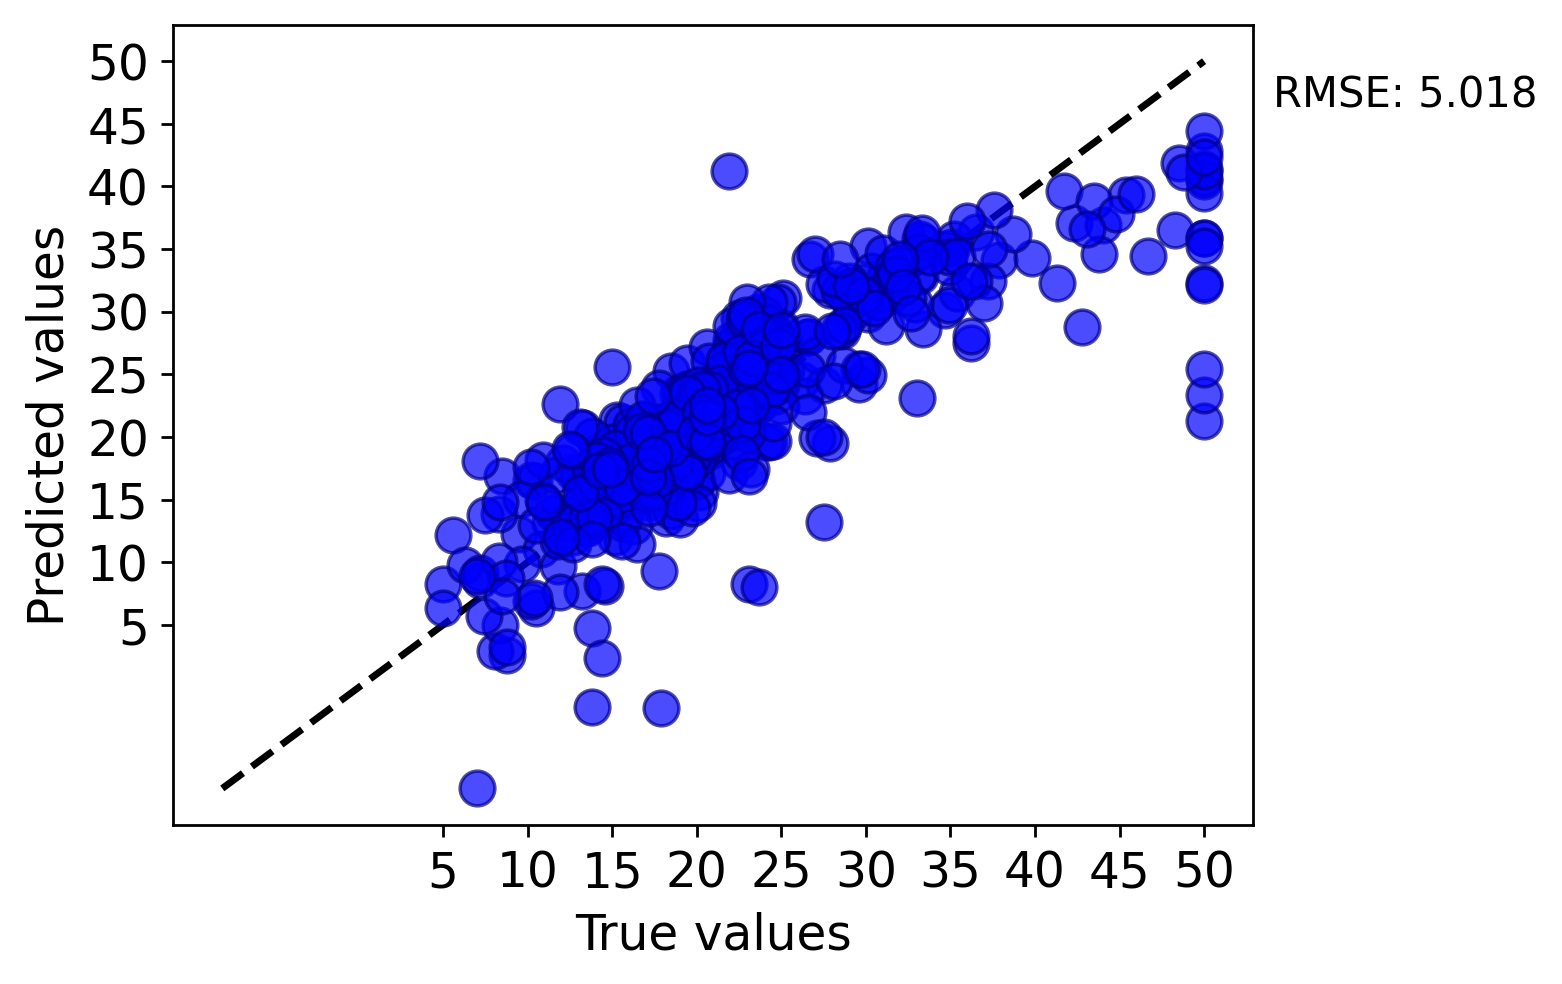

## Kernel ridge model test data parity plot:
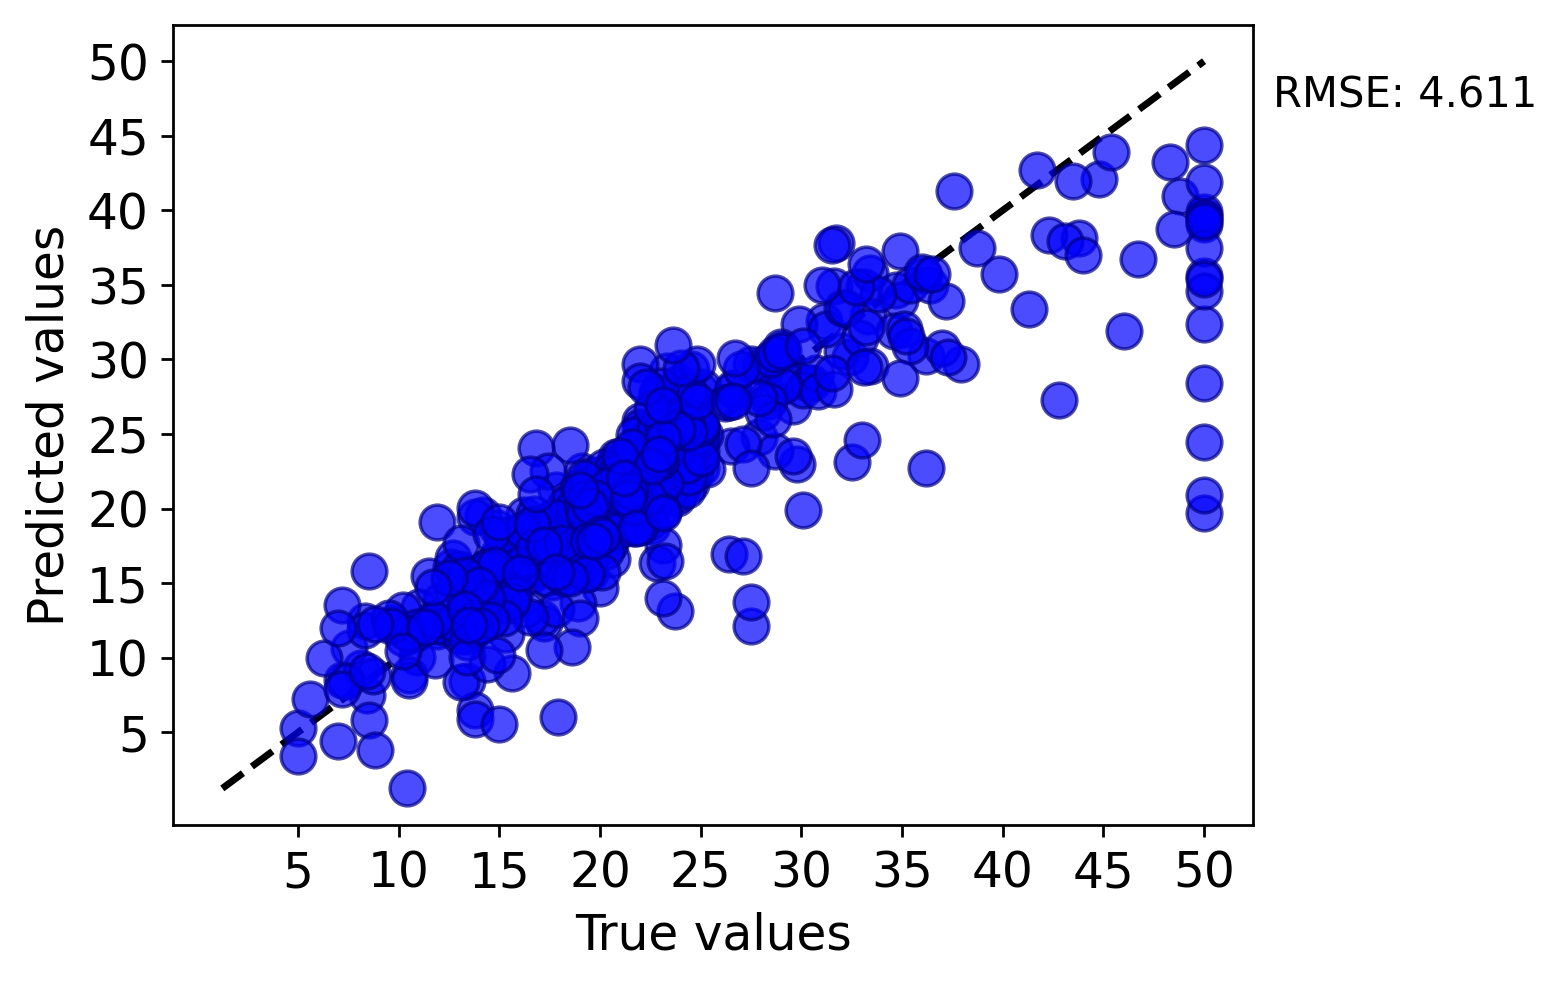

## Random forest model test data parity plot:
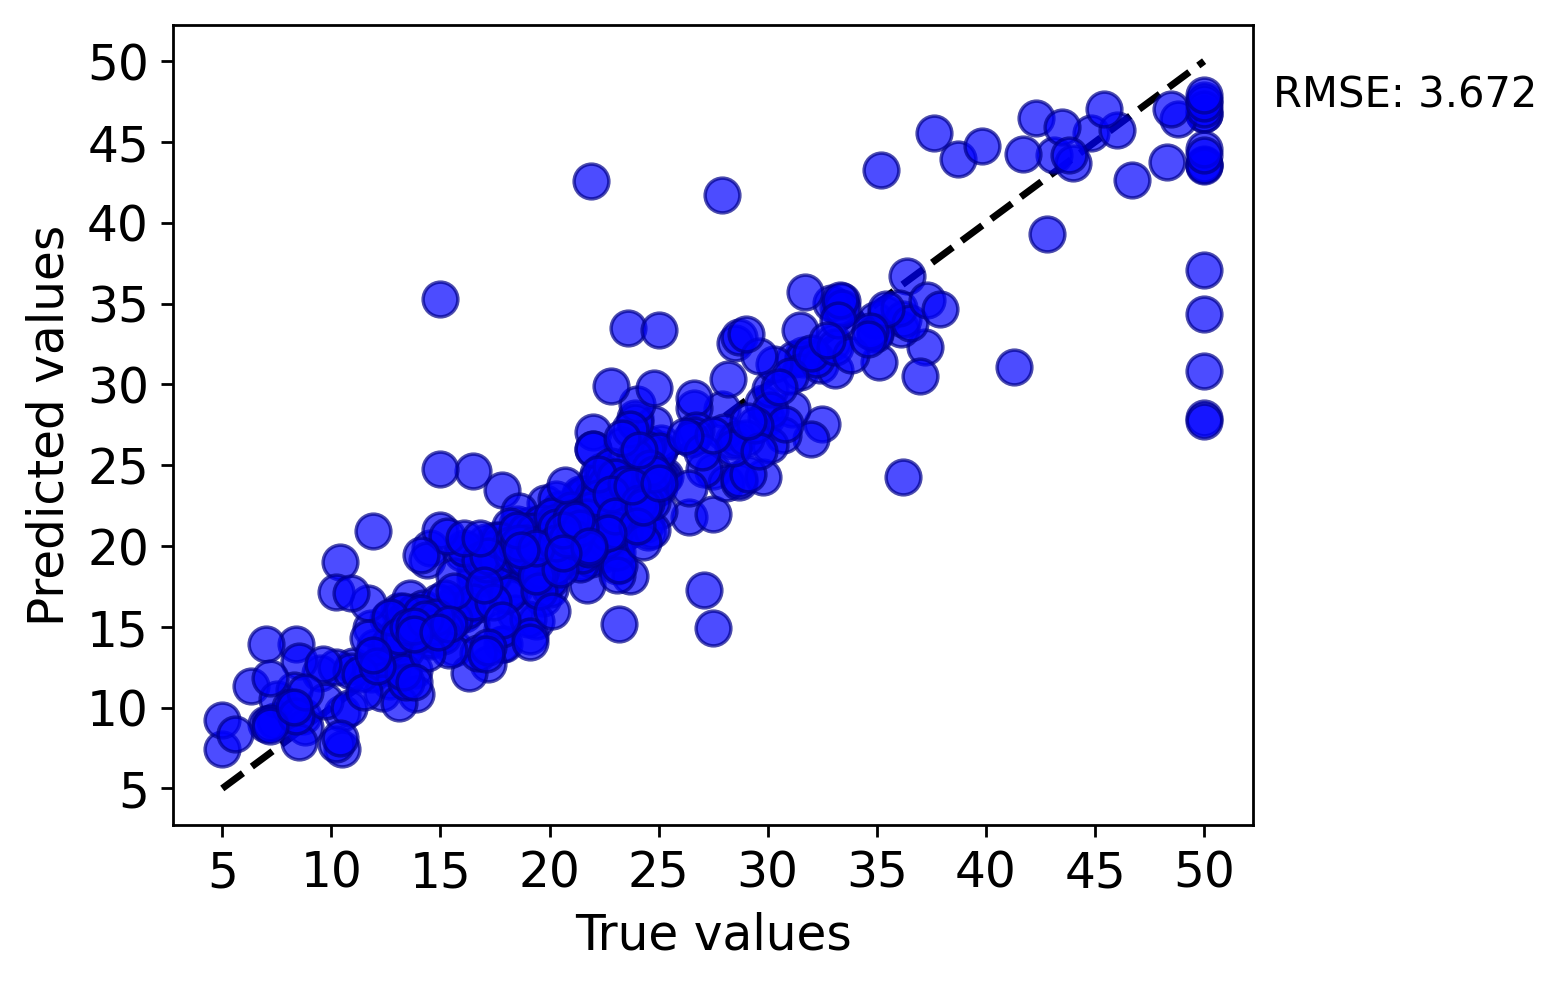

Another type of parity plot that MAST-ML creates is that showing the best and worst splits
from a particular test. Below is the best and worst splits on test data for our random forest
model:

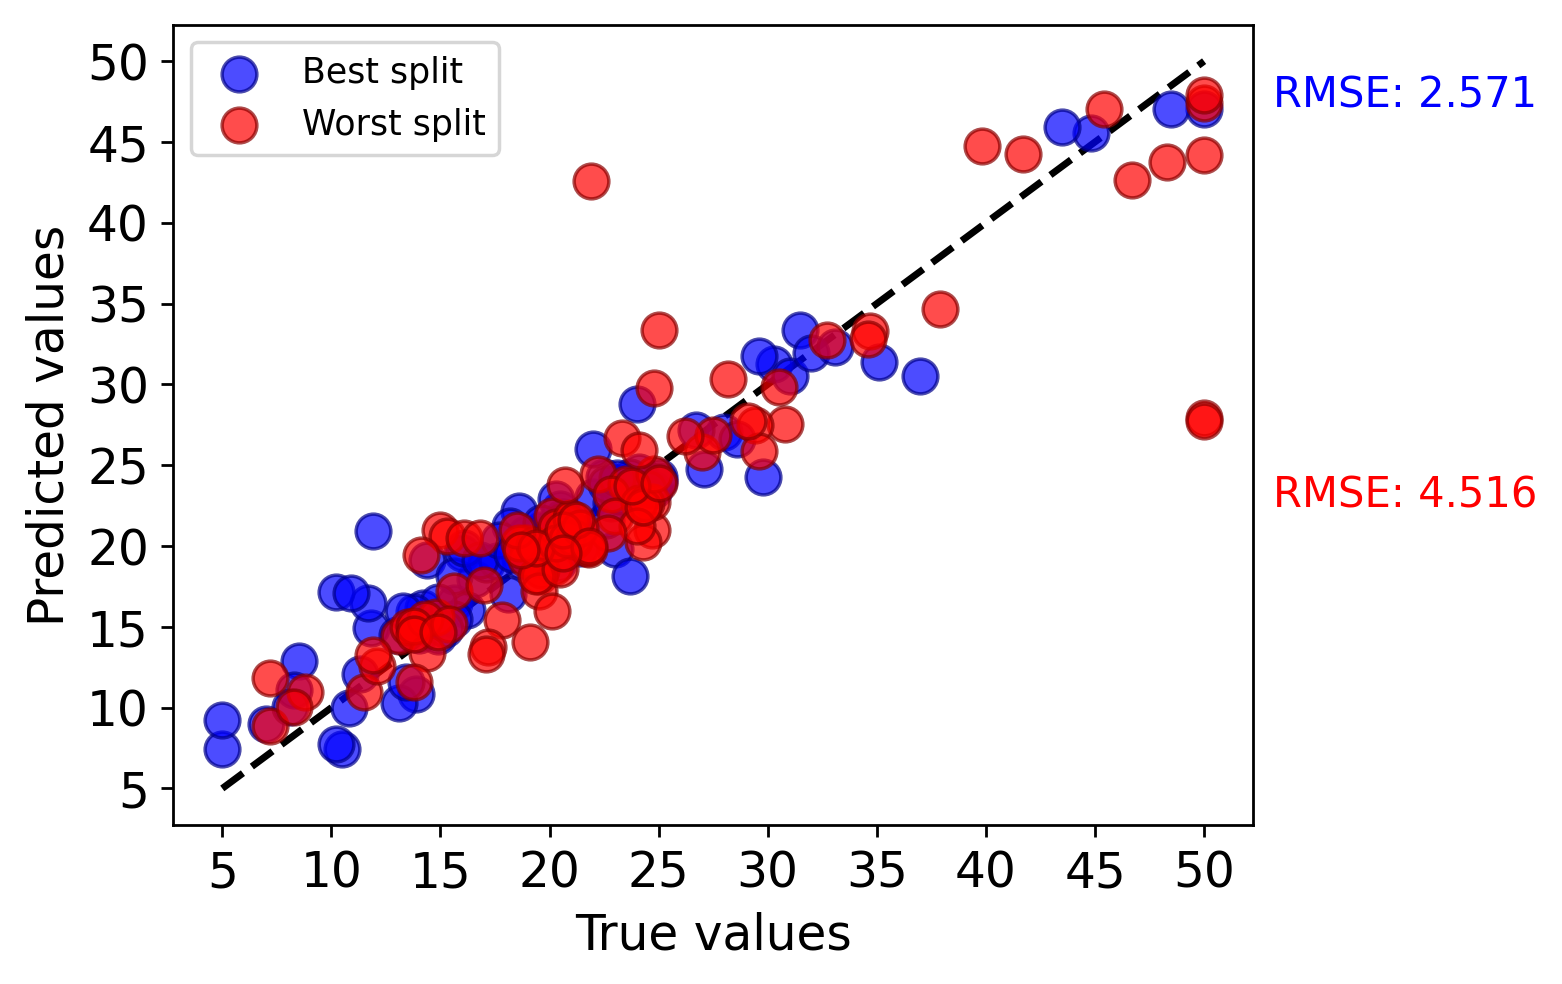

There are other types of analysis plots beyond these simple parity plots shown here. We will investigate
these pieces of analysis in more detail in future tutorials

Congratulations! You've completed your first MAST-ML run. This is just the first in a series of tutorial notebooks.
There are many other notebooks to explore that will guide you through different aspects of what MAST-ML can offer,
including the different types of output plots and data files, how to import your own data or download data from
commonly used online materials databases, fitting different types of models, more complex fits that involve tuning
hyperparameters, generating and selecting features, as well as in-depth model uncertainty quantification.

The next example in this notebook series is titled MASTML_Tutorial_2_DataImport.ipynb, and will guide you through the process of importing data from a local source and downloading and importing data from an online database